<a href="https://colab.research.google.com/github/Amit-27214/Neural-Art-Tasks/blob/main/Task3_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries and Implementing K mean funtion


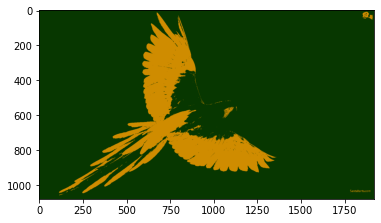

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
# from scipy.io import loadmat
import cv2
from scipy import misc

def read_image():
	
	img =  cv2.imread('/content/Sample Image.jpg') 
 
#	plt.imshow(img) # plotting the image
	# plt.show()
	
	# scaling it so that the values are small
	img = img / 255

	return img

def initialize_means(img, clusters):
	
	# reshaping it or flattening it into a 2d matrix
	points = np.reshape(img, (img.shape[0] * img.shape[1],
											img.shape[2]))
	m, n = points.shape


	# Clusters the number of colors that we choose.
	
	# means is the array of assumed means or centroids.
	means = np.zeros((clusters, n))

	# Random selection of k mean points out of all points.
	for i in range(clusters):
		rand1 = int(np.random.random(1)*10)
		rand2 = int(np.random.random(1)*8)
		means[i, 0] = points[rand1, 0]
		means[i, 1] = points[rand2, 1]

	return points, means

# Calculating euclidean distance from k mean points
def distance(x1, y1, x2, y2):
	
	dist = np.square(x1 - x2) + np.square(y1 - y2)
	dist = np.sqrt(dist)

	return dist


def k_means(points, means, clusters):

	iterations = 10 # Assuming that after fixed iteration there is no significant
  #change in mean point values
	m, n = points.shape
	
	# Classification of point to correspoding clusters
	index = np.zeros(m)

	# Implementing k mean algorithm
	while(iterations > 0):

		for j in range(len(points)):
			
		# initialize minimum value to a large value
			minv = 1000
			temp = None
			
			for k in range(clusters):
				
				x1 = points[j, 0]
				y1 = points[j, 1]
				x2 = means[k, 0]
				y2 = means[k, 1]
				
				if(distance(x1, y1, x2, y2) < minv):		
					minv = distance(x1, y1, x2, y2)
					temp = k
					index[j] = k
		
		for k in range(clusters):
			
			sumx = 0
			sumy = 0
			count = 0
			
			for j in range(len(points)):
				
				if(index[j] == k):
					sumx += points[j, 0]
					sumy += points[j, 1]
					count += 1
			
			if(count == 0):
				count = 1	
			
			means[k, 0] = float(sumx / count)
			means[k, 1] = float(sumy / count)	
			
		iterations -= 1
	return means, index


def compress_image(means, index, img):

	# assigning each pixel to its corresponding centroid to get clustered image.
	centroid = np.array(means)
	recovered = centroid[index.astype(int), :]
	
	# Reshaping image to original 3-d shape
	recovered = np.reshape(recovered, (img.shape[0], img.shape[1],
													img.shape[2]))

	# plotting the compressed image.
	plt.imshow(recovered)
	plt.show()

	# saving the compressed image.
	#misc.imsave('compressed_' + str(clusters) +
					#	'_colors.png', recovered)


# Driver Code
if __name__ == '__main__':

	img = read_image()

	clusters = 2
	
	points, means = initialize_means(img, clusters)
	means, index = k_means(points, means, clusters)
	compress_image(means, index, img)
# compressed image output